# Lambda School, Intro to Data Science, Day 4

## Inferential Statistics Assignment

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import random
from statistics import mean, stdev

# Titanic

Use the [`describe` function in pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) to calculate summary statistics (including mean and standard deviation) for `age` and `fare`.

Think, and be ready to discuss: How do these two features compare in their central tendency and in their spread?

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv', index_col=0)
features = ['age', 'fare']
##df.dropna(subset=features, inplace=True)
df.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df['age'].isnull().sum()

177

In [4]:
#checking if age and fare columns have any null values

print(sum(pd.isnull(df.age)))
print(sum(pd.isnull(df.fare)))

177
0


In [78]:
#fill empty age rows with the forward value age
df['age'] = df['age'].fillna(method='ffill')

#checking if null values have been filled
print(sum(pd.isnull(df.age)))


0


(array([ 71.,  58., 220., 202., 154.,  86.,  58.,  29.,  11.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

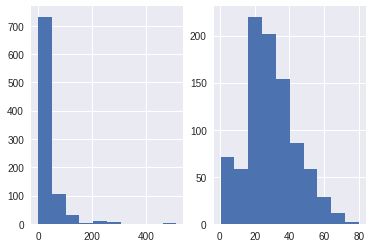

In [85]:
fig, ax = plt.subplots(1,2)
ax[0].hist(df.fare)
ax[1].hist(df.age)

Plot histograms for both features.

Think, and be ready to discuss: What do you notice about the shape of these distributions?

In [0]:
#the age graph sort of resembles a bell curve, while the fare graph is denser in the beginning and the density decreases and the fare increases

# Clumsy Carl

Re-do the Clumsy Carl problem -- but suppose that Carl broke **2** of 5 dishes. What's the p-value?

Think, and be ready to discuss: Would you reject the null hypothesis?

Suggestion: You can look at the lecture notebook, but **don't copy-paste** from it!

> You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons. —*[Learn Python the Hard Way](https://learnpythonthehardway.org/book/intro.html)*

---

Here's the problem restated:

Imagine a restaurant employs five dishwashers:
- Alice
- Bob
- Carl
- Dave
- Eric

One week, they break five dishes -- and Carl breaks **two** of the five. So, his coworkers have a hypothesis: Carl is clumsy!

Carl says no, it was just bad luck and random chance: it could have happened to anybody. We can call this the null hypothesis.

Can we do some math to help answer this argument? What's the probability it was just bad luck?

We can write a Monte Carlo simulation to estimate the probability that Carl breaks at least four of the five dishes, assuming that breaking a dish is a truly random event. (We'll assume that the dishwashers have identical workloads and skills.)


In [88]:
import random
from statistics import mean, stdev
dishwashers = ['Alice', 'Bob', 'Carl', 'Dave', 'Eric']
def break_dishes():
  broken = [random.choice(dishwashers) for _ in range(5)]
  return broken.count('Carl')

monte_carlo=[break_dishes() for _ in range (100000)]

#mean of broken dishes
the_mean, std_dev = mean(monte_carlo), stdev(monte_carlo)

#odds of breaking atleast 2 dishes
odds_of_two = (sum(break_dishes() >= 2 for _ in monte_carlo)/100000)
p_value_two = mean(break_dishes() >=2 for _ in monte_carlo)
if p_value_two < .05:
  print('We reject the null hypothsis that this was just bad luck, It is likely that Carl is clumsy, the p_value of him breaking atleast 2 dishes is', p_value_two)
else:
  print('We accept the null hypothsis, in all likelihood Carl is not clumsy, he was just unlucky, the p_value of him breaking atleast 2 dishes is', p_value_two)


We accept the null hypothsis, in all likelihood Carl is not clumsy, he was just unlucky, the p_value of him breaking atleast 2 dishes is 0.26271


In [89]:
print(odds_of_two)

0.26413


# Two dice
Simulate the distribution of adding two dice.

What is the mean? Standard deviation?

In [101]:
import random
import numpy as np
def die_rolls():
  sides = list(range(1,7))
  die = [random.choice(sides) for _ in range (2)]
  return die

monte_carlo_two = [sum(die_rolls()) for _ in range(100000)]
calculation = {'mean': np.mean(monte_carlo_two), 'standard deviation': np.std(monte_carlo_two)}
std_dev = np.std(monte_carlo_two)
print('Mean is: ', calculation['mean'], 'Standard Deviation is: ', calculation['standard deviation'])




Mean is:  7.00379 Standard Deviation is:  2.4196478330327325


What is the standard score (z score) of rolling a 10?

In [102]:
z_score = ((10 - calculation['mean'])/calculation['standard deviation'])
z_score

1.238283505184561

What is the probability of rolling a 10 or higher?

In [107]:
probability = (sum(x >= 10 for x in monte_carlo_two)/100000) 
print('The probability of rolling a 10 or higher {}%'.format(probability))


The probability of rolling a 10 or higher 0.16784%


# Harvest

Using bootstrap resampling, calculate the 95% confidence interval for mean apple weight ...

In [115]:
def bootstrap_sample(items):
    # Random resample *with replacement*
    return random.choices(items, k=len(items))

def percentile(x, p):
    # x: List of numbers
    # p: Percentile, between 0 and 100
    i = round(len(x) * p/100)
    return sorted(x)[i]

apples = [.5, .4, .5, .6, .3, .7]
mean_apples = [mean(bootstrap_sample(apples)) for _ in range(100000)]
percentile(mean_apples,5), percentile(mean_apples,95)


(0.41666666666666663, 0.5833333333333333)

... and for mean pumpkin weight:

In [117]:
pumpkins = [1, 1, 1, 3, 3, 591]
mean_pumpkins = [mean(bootstrap_sample(pumpkins)) for _ in range(100000)]
percentile(mean_pumpkins,5),percentile(mean_pumpkins,95)

(1.3333333333333333, 296.3333333333333)